# Import library and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('data.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Dealing with missing values

In [4]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_mv = raw_data.dropna(axis = 0)

In [6]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Dealing with outliers

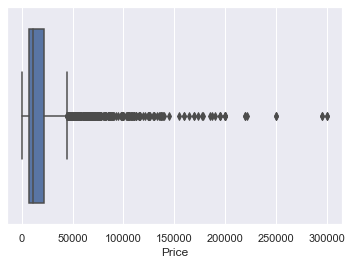

In [7]:
sns.boxplot(data_no_mv['Price'])

In [8]:
Q1 = data_no_mv['Price'].quantile(0.25)
Q3 = data_no_mv['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

-15352.5
44251.5


In [9]:
data_no_mv = data_no_mv[data_no_mv['Price'] < upper]

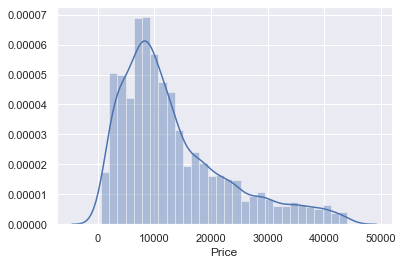

In [10]:
sns.distplot(data_no_mv['Price'])

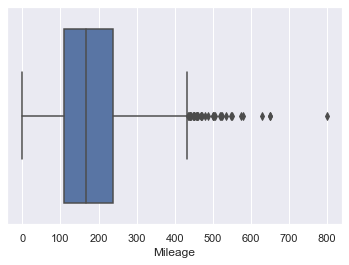

In [11]:
sns.boxplot(data_no_mv['Mileage'])

In [12]:
Q1 = data_no_mv['Mileage'].quantile(0.25)
Q3 = data_no_mv['Mileage'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

-87.0
433.0


In [13]:
data_no_mv = data_no_mv[data_no_mv['Mileage'] < upper]

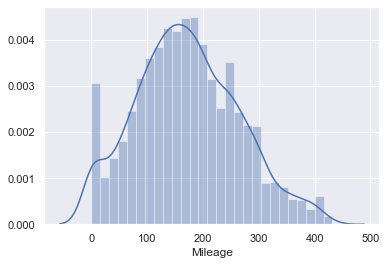

In [14]:
sns.distplot(data_no_mv['Mileage'])

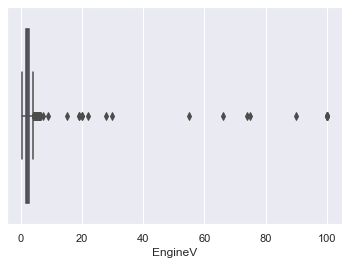

In [15]:
sns.boxplot(x = data_no_mv['EngineV'])

In [16]:
Q1 = data_no_mv['EngineV'].quantile(0.25)
Q3 = data_no_mv['EngineV'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

0.3000000000000005
4.299999999999999


In [17]:
data_no_mv = data_no_mv[data_no_mv['EngineV'] < upper]

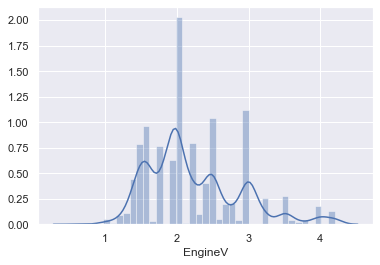

In [18]:
sns.distplot(data_no_mv['EngineV'])

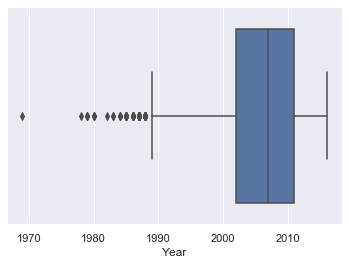

In [19]:
sns.boxplot(x = data_no_mv['Year'])

In [20]:
Q1 = data_no_mv['Year'].quantile(0.25)
Q3 = data_no_mv['Year'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(upper)
print(lower)

2024.5
1988.5


In [21]:
data_no_mv = data_no_mv[data_no_mv['Year'] > lower]

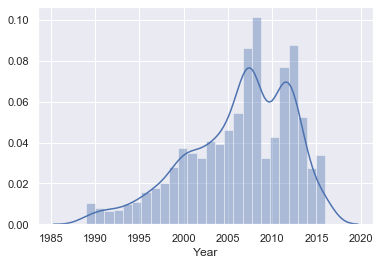

In [22]:
sns.distplot(data_no_mv['Year'])

In [23]:
data_clean = data_no_mv.copy()

In [24]:
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3345,3345.000000,3345,3345.000000,3345.000000,3345,3345,3345.000000,3345
unique,7,NaN,6,NaN,NaN,4,2,NaN,232
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,813,NaN,1296,NaN,NaN,1574,2989,NaN,175
mean,NaN,13099.139181,NaN,170.463677,2.228978,NaN,NaN,2006.217937,NaN
std,NaN,9142.558203,NaN,91.088687,0.653720,NaN,NaN,5.860319,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1989.000000,NaN
25%,NaN,6800.000000,NaN,107.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,10500.000000,NaN,165.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,17500.000000,NaN,232.000000,2.500000,NaN,NaN,2011.000000,NaN


# Relaxing The Assumptions

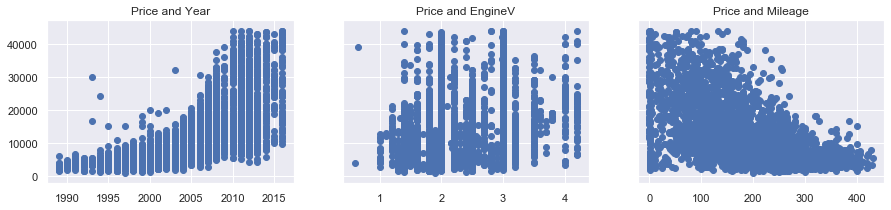

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_clean['Year'],data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'],data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [26]:
log_price = np.log(data_clean['Price'])
data_clean['log_price'] = log_price
data_clean.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
count,3345,3345.000000,3345,3345.000000,3345.000000,3345,3345,3345.000000,3345,3345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,232,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,813,NaN,1296,NaN,NaN,1574,2989,NaN,175,NaN
mean,NaN,13099.139181,NaN,170.463677,2.228978,NaN,NaN,2006.217937,NaN,9.237109
std,NaN,9142.558203,NaN,91.088687,0.653720,NaN,NaN,5.860319,NaN,0.726794
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1989.000000,NaN,6.684612
25%,NaN,6800.000000,NaN,107.000000,1.800000,NaN,NaN,2003.000000,NaN,8.824678
50%,NaN,10500.000000,NaN,165.000000,2.000000,NaN,NaN,2007.000000,NaN,9.259131
75%,NaN,17500.000000,NaN,232.000000,2.500000,NaN,NaN,2011.000000,NaN,9.769956


Text(0.5, 1.0, 'Price and Mileage')

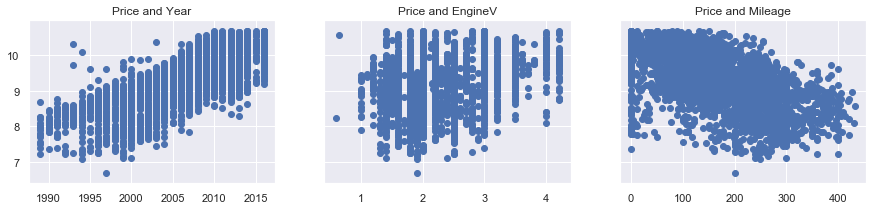

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize = (15,3))
ax1.scatter(data_clean['Year'], data_clean['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['log_price'])
ax3.set_title('Price and Mileage')

In [28]:
data_clean = data_clean.drop(['Price'], axis = 1)
data_clean

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
7,Audi,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
...,...,...,...,...,...,...,...,...,...
4337,Renault,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4341,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557


# Multicollinearity and Variance Inflation Factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [30]:
vif

,VIF,features
0,4.599495,Mileage
1,14.306217,Year
2,12.954622,EngineV


In [31]:
data_no_multicol = data_clean.drop(columns = ['EngineV', 'Year']) 

In [32]:
data_no_multicol

,Brand,Body,Mileage,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,Diesel,yes,Sprinter 212,8.974618
3,Audi,crossover,240,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,Petrol,yes,Rav 4,9.814656
7,Audi,vagon,200,Diesel,yes,A6,9.560997
...,...,...,...,...,...,...,...
4337,Renault,sedan,152,Petrol,yes,Megane,8.824678
4338,Volkswagen,van,163,Diesel,yes,T5 (Transporter),9.350102
4339,Toyota,sedan,35,Petrol,yes,Corolla,9.792556
4341,BMW,sedan,1,Petrol,yes,535,8.779557


# Dealing with dummies variables

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicol, drop_first = True)

In [34]:
data_with_dummies

,Mileage,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,277,8.342840,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,8.974618,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,10.043249,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,9.814656,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,200,9.560997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,8.824678,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,163,9.350102,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4339,35,9.792556,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,1,8.779557,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data_with_dummies.columns.values

array(['Mileage', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'Model_100', 'Model_116',
       'Model_118', 'Model_120', 'Model_19', 'Model_190', 'Model_200',
       'Model_210', 'Model_220', 'Model_230', 'Model_250', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_630', 'Model_730', 'Model_735', 'Model_740', 'Model_80',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'M

In [36]:
dummies = ['log_price','Mileage', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'Model_100', 'Model_116',
       'Model_118', 'Model_120', 'Model_19', 'Model_190', 'Model_200',
       'Model_210', 'Model_220', 'Model_230', 'Model_250', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_630', 'Model_730', 'Model_735', 'Model_740', 'Model_80',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLS 350', 'Model_Caddy',
       'Model_Camry', 'Model_Captur', 'Model_Caravelle', 'Model_Carina',
       'Model_Carisma', 'Model_Celica', 'Model_Clio', 'Model_Colt',
       'Model_Corolla', 'Model_Corolla Verso', 'Model_Cross Touran',
       'Model_Dokker', 'Model_Duster', 'Model_E-Class', 'Model_Eclipse',
       'Model_Eos', 'Model_Espace', 'Model_FJ Cruiser', 'Model_Fluence',
       'Model_Fortuner', 'Model_G 320', 'Model_GL 320', 'Model_GL 420',
       'Model_GLK 220', 'Model_GLK 300', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 200', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_ML 250', 'Model_ML 270',
       'Model_ML 280', 'Model_ML 320', 'Model_ML 350', 'Model_ML 400',
       'Model_Master', 'Model_Matrix', 'Model_Megane', 'Model_Modus',
       'Model_Multivan', 'Model_New Beetle', 'Model_Outlander',
       'Model_Outlander XL', 'Model_Pajero', 'Model_Pajero Pinin',
       'Model_Pajero Sport', 'Model_Pajero Wagon', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_Rav 4', 'Model_S 140', 'Model_S 300', 'Model_S 320',
       'Model_S 350', 'Model_S 400', 'Model_S4', 'Model_S5', 'Model_S8',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sharan', 'Model_Sienna', 'Model_Smart',
       'Model_Space Star', 'Model_Space Wagon', 'Model_Sprinter 208',
       'Model_Sprinter 210', 'Model_Sprinter 211', 'Model_Sprinter 212',
       'Model_Sprinter 213', 'Model_Sprinter 311', 'Model_Sprinter 312',
       'Model_Sprinter 313', 'Model_Sprinter 315', 'Model_Sprinter 316',
       'Model_Sprinter 318', 'Model_Sprinter 319', 'Model_Symbol',
       'Model_Syncro', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Up', 'Model_Vaneo', 'Model_Vento', 'Model_Venza',
       'Model_Viano', 'Model_Virage', 'Model_Vista', 'Model_Vito',
       'Model_X1', 'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [37]:
data = data_with_dummies[dummies]

In [38]:
data

,log_price,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9.560997,200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,8.824678,152,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,9.350102,163,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4339,9.792556,35,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = data['log_price']
X = data.drop('log_price', axis = 1)

# Backward Elimination

In [40]:
import statsmodels.api as sm
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [41]:
print(backward_elimination(X,y))

['Mileage', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes', 'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_220', 'Model_320', 'Model_330', 'Model_335', 'Model_428', 'Model_4Runner', 'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_528', 'Model_530', 'Model_535', 'Model_630', 'Model_730', 'Model_735', 'Model_740', 'Model_80', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avensis', 'Model_Aygo', 'Model_B 180', 'Model_B 200', 'Model_Bora', 'Model_C-Class', 'Model_CLA 200', 'Model_CLA 220', 'Model_CLA-Class', 'Model_CLK 220', 'Model_CLK 320', 'Model_CLS 350', 'Model_Caddy', 'Model_Caravelle', 'Model_Carina', 'Model_Clio', 'Model_Colt', 'Model_Corolla', 'Model_E-Class', 'Model_FJ Cruiser', 'Model_G 

In [42]:
backward = backward_elimination(X,y)

In [43]:
X = data[backward]

# Building the model

## Traning the model

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.16976383, -0.3861213 , -0.56664808, ..., -0.01729286,
        -0.0648301 , -0.0648301 ],
       [ 2.8167568 , -0.3861213 , -0.56664808, ..., -0.01729286,
        -0.0648301 , -0.0648301 ],
       [ 0.76350556, -0.3861213 , -0.56664808, ..., -0.01729286,
        -0.0648301 , -0.0648301 ],
       ...,
       [-1.48738482,  2.5898597 , -0.56664808, ..., -0.01729286,
        -0.0648301 , -0.0648301 ],
       [-1.86070323, -0.3861213 , -0.56664808, ..., -0.01729286,
        -0.0648301 , -0.0648301 ],
       [-0.510169  , -0.3861213 ,  1.76476376, ..., -0.01729286,
        -0.0648301 , -0.0648301 ]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = lin_reg.predict(X_train)

Text(0, 0.5, 'y_pred')

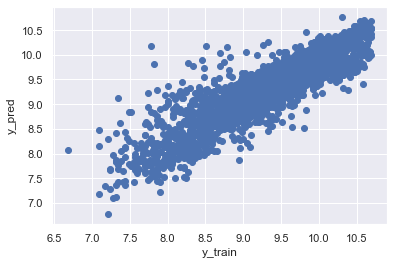

In [48]:
plt.scatter(y_train, y_pred)
plt.xlabel('y_train')
plt.ylabel('y_pred')

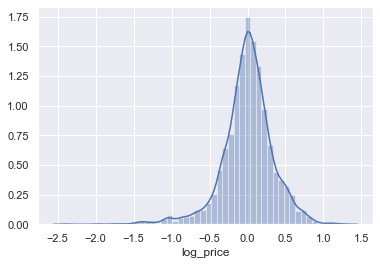

In [49]:
sns.distplot(y_train - y_pred)

In [50]:
def MSE(predict,target):
    return ((predict - target) ** 2).mean()

def MAE(predict, target):
    return (abs(predict - target)).mean()

def RMSE(predict, target):
    return np.sqrt((abs(predict - target) ** 2).mean())

def MAPE(predict, target):
    return (abs((target - predict) / target).mean()) * 100

In [51]:
print('MSE = ', MSE(y_pred, y_train))
print('MAE = ', MAE(y_pred, y_train))
print('RMSE = ', RMSE(y_pred, y_train))
print('MAPE = ', MAPE(y_pred, y_train))

MSE =  0.11521849667780762
MAE =  0.24103105392977586
RMSE =  0.3394385020556855
MAPE =  2.6662243076557024


In [52]:
lin_reg.score(X_train, y_train)

0.7797498182011946

In [53]:
lin_reg.intercept_

8.762455791805229

In [54]:
lin_reg.coef_

array([-3.21290655e-03,  4.37555058e-01,  2.23196947e-01, -2.27400603e-01,
       -4.21801300e-02, -1.10373375e-01, -4.58890188e-02, -2.41442765e-01,
       -1.51514292e-01, -2.12530194e-01,  1.05167964e+00, -3.41149421e-01,
        9.52494628e-01,  7.10587159e-01, -1.21047348e+00, -1.14902365e+00,
        7.89556937e-01,  3.60208814e-01,  4.21877667e-01,  9.97283401e-01,
        1.10720084e+00,  9.17916538e-01,  9.64750521e-01,  5.22015552e-01,
        4.32333819e-01,  4.42384101e-01,  4.25094475e-01,  6.00226864e-01,
        7.40956006e-01,  6.29320920e-01,  4.00928324e-01,  4.53792592e-01,
       -5.86572023e-01,  7.19118138e-01,  5.88395716e-01,  5.27671595e-01,
        1.98301764e-01,  1.05637277e+00,  9.87059479e-01,  3.80361057e-01,
        4.59211220e-01,  9.63060835e-01,  7.05990932e-01,  3.63833446e-01,
        5.23086006e-01, -1.27179496e-01, -1.66518682e-01, -6.07767352e-01,
        5.09843921e-01,  5.69841952e-01, -4.40988289e-01,  3.46660110e-01,
        9.22929832e-01,  

In [55]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lin_reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.003213
1,Brand_Toyota,0.437555
2,Brand_Volkswagen,0.223197
3,Body_hatch,-0.227401
4,Body_sedan,-0.042180
...,...,...
132,Model_X3,1.089752
133,Model_X5,0.975724
134,Model_X5 M,1.087445
135,Model_X6,1.180271


## Testing the model

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg_test = LinearRegression()
lin_reg_test.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

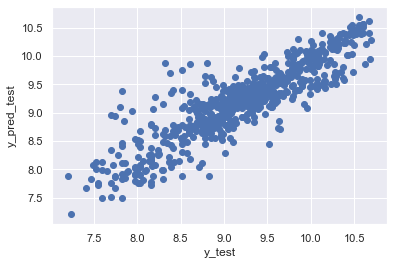

In [57]:
y_pred_test = lin_reg_test.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

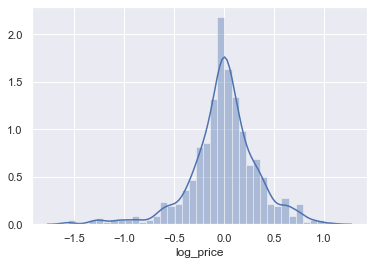

In [58]:
sns.distplot(y_test - y_pred_test)

In [59]:
print('MSE = ', MSE(y_pred_test, y_test))
print('MAE = ', MAE(y_pred_test, y_test))
print('RMSE = ', RMSE(y_pred_test, y_test))
print('MAPE = ', MAPE(y_pred_test, y_test))

MSE =  0.11812866141248123
MAE =  0.23883361634192182
RMSE =  0.3436985036517925
MAPE =  2.6457907066500974


In [60]:
lin_reg_test.score(X_test, y_test)

0.7842302237699663

In [61]:
lin_reg_test.intercept_

8.746281222507296

In [62]:
lin_reg_test.coef_

array([-2.72117921e-03,  3.94632843e-01,  2.39758250e-01, -2.74839408e-01,
       -1.69265048e-01, -2.52208219e-01, -1.37314932e-01, -2.33928477e-01,
       -4.05310702e-02, -1.70683860e-01,  1.06464096e+00, -5.51658711e-01,
        4.29303214e-01, -5.19558679e+09, -4.67842196e+09, -2.01894094e+09,
        5.32046242e-01,  1.79045301e-01,  5.65906085e-01,  6.13590390e-01,
        1.65369772e+08,  5.88862938e+07,  9.82778757e-01,  9.41711481e-01,
        4.82713959e-01,  2.65001034e-01,  4.90109585e-01,  1.26493776e+00,
       -5.67658013e+05,  1.87710092e-01,  3.64399799e-01,  6.10935261e-01,
       -5.05343188e-01, -9.74162015e+04,  4.04891865e-01,  4.97950663e-01,
        2.34632211e-01,  1.27982987e+04,  9.20194359e-01,  3.66847837e-01,
        6.10566832e-01,  1.87192349e+02,  1.83854066e-01,  4.44118953e-01,
        4.21946129e-01, -3.46468855e-01, -3.23926991e-01, -2.39249627e+01,
        5.54721683e-01, -4.29036994e+00, -5.01603385e-01,  4.98898035e-01,
        1.00882885e+00, -

In [63]:
reg_summary_test = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary_test['Weights'] = lin_reg.coef_
reg_summary_test

,Features,Weights
0,Mileage,-0.003213
1,Brand_Toyota,0.437555
2,Brand_Volkswagen,0.223197
3,Body_hatch,-0.227401
4,Body_sedan,-0.042180
...,...,...
132,Model_X3,1.089752
133,Model_X5,0.975724
134,Model_X5 M,1.087445
135,Model_X6,1.180271
